<h3> NBA 5 year careeer prediction using XBoost Classifier

In [1]:
import pandas as pd
import numpy as np

<h4> 1. Load processed sets

<h5> Loading scaled training, validation and test sets from data_prep step saved on the data/processed folder saving them into X_train, X_val, y_train, y_val, X_test, X_test_ID variables

In [2]:
#Load Test and validation sets using custom function load_sets
from src.data.sets import load_sets

In [3]:
X_train, X_val, y_train, y_val, X_test, X_test_ID = load_sets()

<h4> 2. Import Random Forest

<h5> Importing and fitting Random Forest Classifier with 300 estimators

In [4]:
from sklearn.ensemble import RandomForestClassifier

In [5]:
# calculating weights for unbalanced data 
sum_wpos = len([item for item in y_train if item==1 ])
sum_wneg = len([item for item in y_train if item==0 ])
sum_wneg/sum_wpos

1.0

<h4> 2.1 Analyse features importance in random forest model with current training sets

In [6]:
rf_model = RandomForestClassifier(n_estimators = 150, random_state=44)

In [7]:
#from sklearn.feature_selection import SelectFromModel
#sel = SelectFromModel(rf_model
                     # , threshold = "0.98*mean"
#                     )
#sel.fit(X_train, y_train)

<h4> 2.2 Finding the most relevant features in making predictions

<h5> After the model has been fitted, we use get.support to find out which features are most relevant in the predictions

In [8]:
#columns = sel.get_support()
#columns = columns.tolist()

<h5> As column importance is given in order of appearance on the scaled set, importing column names saved in data_prep for easy visualization and identification will be performed

<h5> Importing predictor column names and combining with relevant columns to find out the best feature predictors

In [9]:
#predictors  = pd.read_csv('../data/interim/predictor_names.csv')

In [10]:
#predictors_df = predictors.copy()

In [11]:
#predictors = predictors['names'].tolist()

In [12]:
#predictors_df['Relevant_Feature'] = columns

In [13]:
#print(predictors_df)

In [14]:
#print(predictors_df.loc[predictors_df['Relevant_Feature'] == 1])

<h5> <b>CONCLUSION ON PREDICTORS: </b> Based on the rebalanced training set from data_prep, 6 features are the most relevant predictors. Therefore new data prep will be generated for usage of these columns within the model

<h4> 2.3 New data prep to be performed and data sets saved in the ../data/interim folder

<h5> 2.3.1 Get a list of column names to be removed from data set

In [15]:
#columns_to_remove_df = predictors_df.loc[predictors_df['Relevant_Feature'] == 0]

In [16]:
#columns_to_remove = columns_to_remove_df.pop("names")

In [17]:
#columns_to_remove_list = columns_to_remove.values.tolist()

<h5> 2.3.2 Read csvs and remove unwanted columns

In [18]:
# Remove columns with low predictor power training set

In [19]:
#df_cleaned.drop(columns=columns_to_remove_list, axis=1, inplace=True)

In [20]:
#Replace negatives with 0s as there can't be negative values

In [21]:
#Remove unwanted columns based on previous experiments

<h5> Finally, all cleaned and transfor sets will be saved in the data/interim folder using a custom function saved in the src folder

In [22]:
#from src.data.sets import save_sets_interim

In [23]:
#save_sets_interim(X_train, X_val, y_train, y_val, X_test, X_test_ID)

<h4> 3 Train XGB Classifier with new calculated training sets

<h5> Next up, the XGB classifier will be imported and trained with the new training set and saved into the models folder

In [24]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=150, random_state=44)

<h5> After the model has been fitted, it will be saved in the models folder in case it needs to be re-called on a later process

In [25]:
from sklearn.metrics import accuracy_score

In [26]:
#Save model in the models folder
#from joblib import dump
#dump(rf_model, '../models/RF3.joblib')

<h4> 3.1 Generate predictions for training and validation sets in order to compare accuracy vs Baseline

<h5> The fitted model will be used to predict the validation set and accuracy willl be calculated to compare vs the baseline

In [27]:
y_val_preds = rf_model.predict(X_val)

In [28]:
y_trainpreds = rf_model.predict(X_train)

<h4> 3.2 Calculate mse and mae to assess fiting accuracy for the training and validation sets

In [29]:
#Get error/score metrics
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

In [30]:
rf_model.score(X_train, y_train)

1.0

In [31]:
rf_model.score(X_val, y_val)

0.8125

<h5> The training model shows a perfect fit, however the model score drops to 0.80 on the validation set

<h4> 3 Analysis of the validation set

<h5> Analysis of the results will be done through a confusion matrix to gather insights as to where the accuracy/innacuracy exists in order to improve the model in future experiments <br> <br> We'll look into a confusion matrix to see the distribution of the predictions from the model

In [32]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

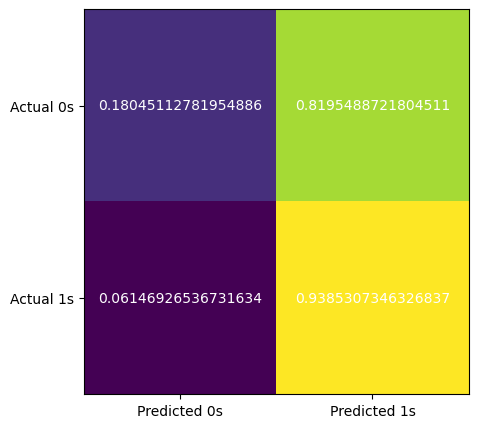

In [33]:
cm = confusion_matrix(y_val, y_val_preds , normalize='true'
                     )

fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()

<h5> As seen in the confusion matrix, 92% of true positive target was predicted correctly, however, 81% of negative target was predicted incorrectly (false positive)

In [34]:
import scikitplot as skplt
import matplotlib.pyplot as plt

In [35]:
y_val_prob = rf_model.predict_proba(X_val)

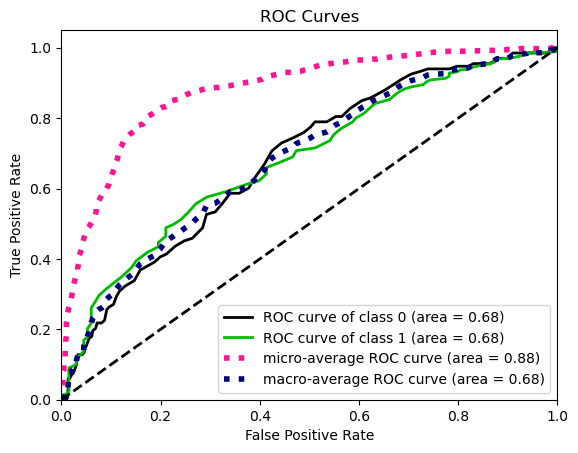

In [36]:
skplt.metrics.plot_roc(y_val, y_val_prob)
plt.show()

<h5> When analysing the results on the validation set, the AUROC is 0.68, meaning the model is predicting only 69% of the instances correctly

In [37]:
#Analyse lines that are not predicted correctly

In [38]:
#Filter Predicted 1 actual 0

In [39]:
X_val_df = pd. DataFrame(X_val, columns = predictors)

NameError: name 'predictors' is not defined

In [ ]:
y_val_list = y_val.tolist()
X_val_df['y_val']=y_val_list

In [ ]:
X_val_df['y_val_preds']=y_val_preds

In [ ]:
#Filter observations for Actual=0 but prediction = 1

In [ ]:
#True Negatives
X_val_true_neg = X_val_df[(X_val_df['y_val']==0)&(X_val_df['y_val_preds']==0)]
X_val_true_neg.describe()

In [ ]:
#False Positive
X_val_false_pos = X_val_df[(X_val_df['y_val']==0)&(X_val_df['y_val_preds']==1)]
X_val_false_pos.describe()

In [ ]:
# True Positives
X_val_true_pos = X_val_df[(X_val_df['y_val']==1)&(X_val_df['y_val_preds']==1)]
X_val_true_pos.describe()

In [ ]:
# False Negative
X_val_false_neg = X_val_df[(X_val_df['y_val']==1)&(X_val_df['y_val_preds']==0)]
X_val_false_neg.describe()

<h4> 4 Generate predictions on the test set for Kaggle submission

<h5> The final step is to generate the prediction probabilities from the test set in order to evaluate the score from Kaggle via csv upload

In [ ]:
y_test_preds = rf_model.predict_proba(X_test)

In [ ]:
#Create Data Frame for Doc printing
df =pd.DataFrame()

In [ ]:
y_test_preds

In [ ]:
target_prob = y_test_preds
target_prob = [item[1] for item in y_test_preds]

In [ ]:
df['Id'] = X_test_ID
df['TARGET_5Yrs'] = target_prob

In [ ]:
df.head()

In [ ]:
#Saving predictions into csv
df.to_csv('../data/external/Kaggle_submission_RF_team_trial_1.csv', index=False)